### ADS 500B - Final Project - Group 6
#### Sanjay Regi Philip, Maha Jayapal, Luke Hiura

#### Library and File Import

Module: Library Import <br>
Purpose: To import the neceassary libraries to use for EDA and Analysis <br>
Last Updated by Sanjay - 8/5 at 7pm <br>
Previously Updated by: blank <br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

##### Module: File Import<br>
Purpose: To import the data file, Dataset 2, provided in the Final Project instructions<br>
Last Updated by Sanjay - 8/5 at 7pm <br>
Previously Updated by: blank <br>

In [2]:
## Use Pandas read function
## Remember to change filepath to your machine
#house_df = pd.read_csv('C:/Users/Luke/OneDrive/Data Science MS/Data Science Programming/ADS 500B/house_sales.csv' , header = 0)
house_df = pd.read_csv('C:/Users/Luke/OneDrive/Data Science MS/Data Science Programming/ADS 500B/house_sales.csv' , header = 0)

#make sure file was read properly
house_df.head()
house_df.shape

(21613, 21)

### Data PreProcessing

##### Dataset and information regarding each notation <br>

This dataset contains house sale prices for King County, which includes Seattle. <br>

It includes homes sold between May 2014 and May 2015. <br>

##### Description of variables: <br>

id: a notation for a house <br>
date: Date house was sold <br>
price: Price is prediction target <br>
bedrooms: Number of Bedrooms/House <br>
bathrooms: Number of bathrooms/bedrooms <br>
sqft_living: square footage of the home <br>
sqft_lot: square footage of the lot <br>
floors: Total floors (levels) in house <br>
waterfront: House which has a view to a waterfront <br>
view: Has been viewed <br>
condition: How good the condition is Overall <br>
grade: overall grade given to the housing unit, based on King County grading system <br>
sqft_above: square footage of house apart from basement <br>
sqft_basement: square footage of the basement <br>
yr_built: Built Year <br>
yr_renovated: Year when house was renovated <br>
zipcode: zip code <br>
lat: Latitude coordinate <br>
long: Longitude coordinate <br>
sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area <br>
sqft_lot15: lotSize area in 2015(implies-- some renovations) <br>

##### Module: Date Processing<br>
Purpose: Ensure that the data fields in the dataframe are stored as date fields<br>
Last Updated by Sanjay - 8/5 at 7pm <br>
Previously Updated by: blank <br>

In [3]:
## Fix date column
house_df['date'] = pd.to_datetime(house_df['date'])

## check
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Module: Find and Remove Outliers
Purpose: Remove any outliers
Last Updated by Sanjay - 8/9 at 11am
Previously Updated by: blank 

In [4]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,20479.000000,20545.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372821,2.113507,2081.073697,1.517982e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930711,0.768913,915.043176,4.148617e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.500000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Find outliers for key fields

In [5]:
price_outliers = house_df[house_df['price'] > house_df['price'].mean() + 3 * house_df['price'].std()]
bedrooms_outliers = house_df[house_df['bedrooms'] > house_df['bedrooms'].mean() + 3 * house_df['bedrooms'].std()]
bathrooms_outliers = house_df[house_df['bathrooms'] > house_df['bathrooms'].mean() + 3 * house_df['bathrooms'].std()]
sqftliving_outliers = house_df[house_df['sqft_living'] > house_df['sqft_living'].mean() + 3 * house_df['sqft_living'].std()]
sqftlot_outliers = house_df[house_df['sqft_lot'] > house_df['sqft_lot'].mean() + 3 * house_df['sqft_lot'].std()]
sqft_living15_outliers = house_df[house_df['sqft_living15'] > house_df['sqft_living15'].mean() + 3 * house_df['sqft_living15'].std()]
sqft_lot15_outliers = house_df[house_df['sqft_lot15'] > house_df['sqft_lot15'].mean() + 3 * house_df['sqft_lot15'].std()]

In [6]:
house_df.drop(house_df[(house_df['price'] > house_df['price'].mean() + 3 * house_df['price'].std())].index, inplace=True)

In [7]:
house_df.shape

(21207, 21)

In [8]:
house_df.drop(house_df[(house_df['bedrooms'] > house_df['bedrooms'].mean() + 3 * house_df['bedrooms'].std())].index, inplace=True)

In [9]:
house_df.shape

(21161, 21)

In [10]:
house_df.drop(house_df[(house_df['bathrooms'] > house_df['bathrooms'].mean() + 3 * house_df['bathrooms'].std())].index, inplace=True)

In [11]:
house_df.shape

(21068, 21)

In [12]:
house_df.drop(house_df[(house_df['sqft_living'] > house_df['sqft_living'].mean() + 3 * house_df['sqft_living'].std())].index, inplace=True)

In [13]:
house_df.shape

(20907, 21)

In [14]:
house_df.drop(house_df[(house_df['sqft_lot'] > house_df['sqft_lot'].mean() + 3 * house_df['sqft_lot'].std())].index, inplace=True)

In [15]:
house_df.shape

(20596, 21)

In [16]:
house_df.drop(house_df[(house_df['sqft_living15'] > house_df['sqft_living15'].mean() + 3 * house_df['sqft_living15'].std())].index, inplace=True)

In [17]:
house_df.shape

(20416, 21)

In [18]:
house_df.drop(house_df[(house_df['sqft_lot15'] > house_df['sqft_lot15'].mean() + 3 * house_df['sqft_lot15'].std())].index, inplace=True)

In [19]:
house_df.shape

(20157, 21)

In [20]:
# After deleting outliers, 1456 rows were removed
21613 - 20157

1456

##### Module: Remove Duplicate Records<br>
Purpose: Delete any possible duplicate records<br>
Last Updated by Sanjay - 8/9 at 7pm <br>
Previously Updated by: blank <br>

In [21]:
house_df.duplicated(subset=None, keep='first').sum()

0

##### Module: Identify Missing Data Values<br>
Purpose: Identify the number of Values Missing from Each Column for Data Imputation<br>
Last Updated by Sanjay - 8/5 at 7pm <br>
Previously Updated by: blank <br>

In [22]:
#find fields with missing values

house_df.isnull().sum()

id                  0
date                0
price               0
bedrooms         1054
bathrooms        1002
sqft_living      1027
sqft_lot          992
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

##### Module: Predict Missing Values in Data<br>
Purpose: Use Linear Regression to Fill in the Missing Values in the Data<br>
Last Updated by Sanjay - 8/5 at 7pm <br>
Previously Updated by: blank <br>

In [23]:
house_df_imp = house_df
house_median = house_df_imp.median()

In [24]:
house_df_imp = house_df_imp.fillna(value = house_median)

In [25]:
# create variables to conduct regression to find bedrooms based off of square footage

xsqft = np.array(house_df_imp['sqft_living']).reshape((-1, 1))
ybedrooms = np.array(house_df_imp['bedrooms'])

 
# create variables to conduct regression to find bathrooms based off of square footage

ybathrooms = np.array(house_df_imp['bathrooms'])


# create variables to conduct regression to find sqft_lot based off of square footage

ysqftlot = np.array(house_df_imp['sqft_lot'])


# create variables to conduct regression to find sqft_lot based off of square footage

xbedrooms = np.array(house_df_imp['bedrooms']).reshape((-1, 1))
ysqftliving = np.array(house_df_imp['sqft_living'])

In [26]:
# create regression models for where columns where data is missing

bedrooms_model = LinearRegression().fit(xsqft, ybedrooms)
bathrooms_model = LinearRegression().fit(xsqft, ybathrooms)
sqft_lot_model = LinearRegression().fit(xsqft, ysqftlot)
sqft_living_model = LinearRegression().fit(xbedrooms, ysqftliving)

In [27]:
predicted_bedrooms = np.round(bedrooms_model.predict(xsqft), decimals = 0)
predicted_bathrooms = np.round(bathrooms_model.predict(xsqft), decimals = 0)
predicted_lot = np.round(sqft_lot_model.predict(xsqft), decimals = 0)
predicted_living = np.round(bathrooms_model.predict(xbedrooms), decimals = 0)

In [28]:
house_df['predicted_bedrooms'] = predicted_bedrooms
house_df['predicted_bathrooms'] = predicted_bathrooms
house_df['predicted_lot'] = predicted_lot
house_df['predicted_living'] = predicted_living

In [29]:
house_df.isnull().sum()

id                        0
date                      0
price                     0
bedrooms               1054
bathrooms              1002
sqft_living            1027
sqft_lot                992
floors                    0
waterfront                0
view                      0
condition                 0
grade                     0
sqft_above                0
sqft_basement             0
yr_built                  0
yr_renovated              0
zipcode                   0
lat                       0
long                      0
sqft_living15             0
sqft_lot15                0
predicted_bedrooms        0
predicted_bathrooms       0
predicted_lot             0
predicted_living          0
dtype: int64

In [30]:
house_df['bedrooms'] = house_df['bedrooms'].fillna(value=house_df['predicted_bedrooms'])
house_df['bathrooms'] = house_df['bathrooms'].fillna(value=house_df['predicted_bathrooms'])
house_df['sqft_living'] = house_df['sqft_living'].fillna(value=house_df['predicted_living'])
house_df['sqft_lot'] = house_df['sqft_lot'].fillna(value=house_df['predicted_lot'])

In [31]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predicted_bedrooms,predicted_bathrooms,predicted_lot,predicted_living
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,3.0,2.0,7302.0,1.0
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,4.0,2.0,11371.0,1.0
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,3.0,1.0,6102.0,1.0
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,3.0,2.0,9586.0,1.0
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,3.0,2.0,8766.0,1.0


In [32]:
#check results

house_df.isnull().sum()

id                     0
date                   0
price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront             0
view                   0
condition              0
grade                  0
sqft_above             0
sqft_basement          0
yr_built               0
yr_renovated           0
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
predicted_bedrooms     0
predicted_bathrooms    0
predicted_lot          0
predicted_living       0
dtype: int64

In [33]:
house_df['sqft_living'] = house_df['sqft_living'].fillna(value=house_df['sqft_living'])
house_df['sqft_lot'] = house_df['sqft_lot'].fillna(value=house_df['sqft_lot'])

In [34]:
house_df.isnull().sum()

id                     0
date                   0
price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront             0
view                   0
condition              0
grade                  0
sqft_above             0
sqft_basement          0
yr_built               0
yr_renovated           0
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
predicted_bedrooms     0
predicted_bathrooms    0
predicted_lot          0
predicted_living       0
dtype: int64

In [35]:
#check data types of dataframe

house_df.dtypes

id                              int64
date                   datetime64[ns]
price                         float64
bedrooms                      float64
bathrooms                     float64
sqft_living                   float64
sqft_lot                      float64
floors                        float64
waterfront                      int64
view                            int64
condition                       int64
grade                           int64
sqft_above                      int64
sqft_basement                   int64
yr_built                        int64
yr_renovated                    int64
zipcode                         int64
lat                           float64
long                          float64
sqft_living15                   int64
sqft_lot15                      int64
predicted_bedrooms            float64
predicted_bathrooms           float64
predicted_lot                 float64
predicted_living              float64
dtype: object

In [36]:
# adjust data types of imputed values

house_df.astype({"bedrooms": int, "bathrooms": int})

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predicted_bedrooms,predicted_bathrooms,predicted_lot,predicted_living
0,7129300520,2014-10-13,221900.0,3,1,1180.0,5650.0,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,3.0,2.0,7302.0,1.0
1,6414100192,2014-12-09,538000.0,3,2,2570.0,7242.0,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,4.0,2.0,11371.0,1.0
2,5631500400,2015-02-25,180000.0,2,1,770.0,10000.0,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,3.0,1.0,6102.0,1.0
3,2487200875,2014-12-09,604000.0,4,3,1960.0,5000.0,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,3.0,2.0,9586.0,1.0
4,1954400510,2015-02-18,510000.0,3,2,1680.0,8080.0,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,3.0,2.0,8766.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2,1530.0,1131.0,3.0,0,0,...,0,98103,47.6993,-122.346,1530,1509,3.0,2.0,8327.0,1.0
21609,6600060120,2015-02-23,400000.0,4,2,2310.0,5813.0,2.0,0,0,...,0,98146,47.5107,-122.362,1830,7200,4.0,2.0,10610.0,1.0
21610,1523300141,2014-06-23,402101.0,2,0,1020.0,1350.0,2.0,0,0,...,0,98144,47.5944,-122.299,1020,2007,3.0,1.0,6834.0,1.0
21611,291310100,2015-01-16,400000.0,3,2,1600.0,2388.0,2.0,0,0,...,0,98027,47.5345,-122.069,1410,1287,3.0,2.0,8532.0,1.0


In [37]:
house_df = house_df.drop(columns=['predicted_bedrooms','predicted_bathrooms', 'predicted_lot', 'predicted_living'])

In [38]:
house_df.head()
house_df.shape

(20157, 21)

##### Module:  Change Data Types <br>
Purpose: Ensure that all data fields are expected type for analysis <br>
Last Updated by Sanjay - 8/5 at 7pm<br>
Previously Updated by: blank <br>

In [39]:
house_df = house_df.astype({"id": str, "floors": int, "lat": str,"waterfront": 'category',"view": 'category',"condition": 'category', "grade": 'category', 'zipcode' : str, 'long' : str , 'bedrooms' : int, 'bathrooms': int})
#df = df.astype({"a": int, "b": complex})

In [40]:
house_df.dtypes

id                       object
date             datetime64[ns]
price                   float64
bedrooms                  int32
bathrooms                 int32
sqft_living             float64
sqft_lot                float64
floors                    int32
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                      object
long                     object
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [41]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180.0,5650.0,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570.0,7242.0,2,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770.0,10000.0,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960.0,5000.0,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680.0,8080.0,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##### Data Analysis and Visualization

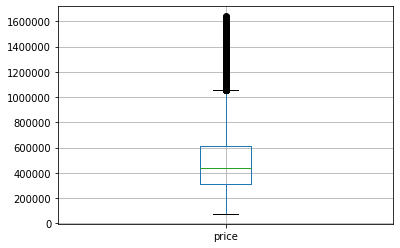

In [42]:
house_df.boxplot(column = ['price'])

##### Checking the price column for outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E00FAE188>]],
      dtype=object)

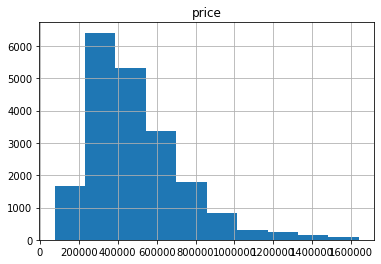

In [43]:
house_df.hist(column = ['price'])

##### Checking whether the price is normally distributed, and it is moderately normal distributed.

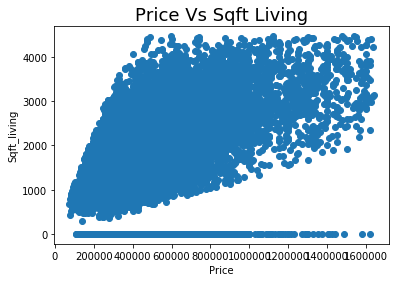

In [44]:
plt.scatter(house_df['price'],house_df['sqft_living'])
plt.xlabel('Price')
plt.ylabel('Sqft_living')
plt.title('Price Vs Sqft Living',size = 18)
plt.show()

##### The scatterplot between price and sqft_living shows a positive correlation.

In [45]:
corr_coef = np.corrcoef(house_df['price'],house_df['sqft_living'])
corr_coef

array([[1.        , 0.52842473],
       [0.52842473, 1.        ]])

##### The correlation coefficient between house price and the square ft living is 0.53

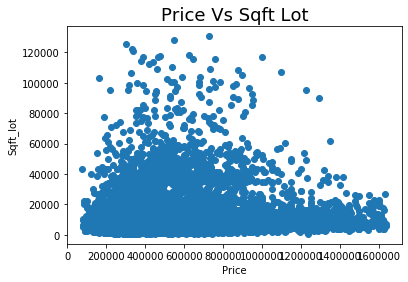

In [46]:
plt.scatter(house_df['price'],house_df['sqft_lot'])
plt.xlabel('Price')
plt.ylabel('Sqft_lot')
plt.title('Price Vs Sqft Lot',size = 18)
plt.show()

##### There doesn't seem to be much correlation between price and the lot size.

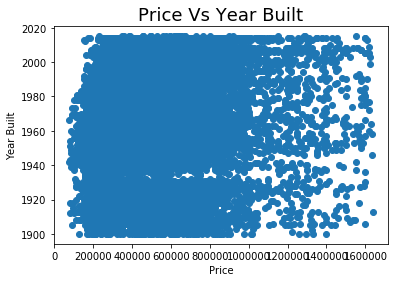

Correlation coefficient: [[1.         0.02093546]
 [0.02093546 1.        ]]


In [47]:
plt.scatter(house_df['price'],house_df['yr_built'])
plt.xlabel('Price')
plt.ylabel('Year Built')
plt.title('Price Vs Year Built',size = 18)
plt.show()
print('Correlation coefficient:', np.corrcoef(house_df['price'],house_df['yr_built']))

##### Suprisingly the year built has almost no correlation with the price.

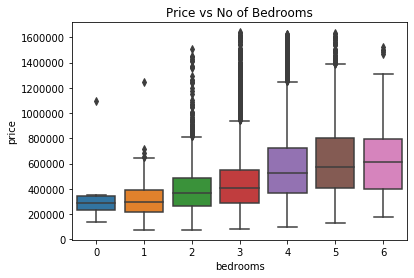

In [48]:
sns.boxplot(x= "bedrooms", y = "price",data= house_df)
plt.title('Price vs No of Bedrooms')
plt.show()

##### The boxplot between price and number of bedrooms shows an increase in price upto 5 bedrooms and then the price saturates 

In [49]:
houseprice_mean = house_df.groupby('zipcode')['price'].mean()

In [50]:
houseprice_mean.head()

zipcode
98001    2.785344e+05
98002    2.329468e+05
98003    2.882460e+05
98004    1.010166e+06
98005    7.541845e+05
Name: price, dtype: float64

##### Grouped the zipcode column based on particular zipcode, and took the mean of price in that group. This will help us figure out which zipcode has expensive homes

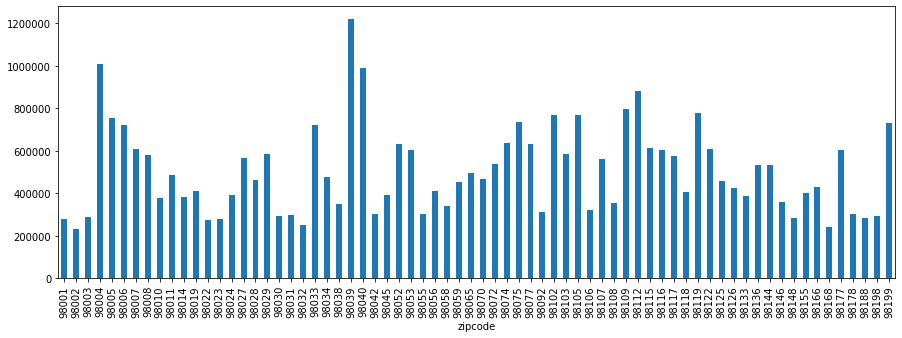

In [51]:
my_plot = houseprice_mean.plot(kind = 'bar',figsize = (15,5))

##### According to the barplot 98039, which is the King County in Washington has the most expensive homes followed by 98004 Bellevue, Washington.

In [52]:
houseprice_mean.shape[0]

70

##### There are 70 zipcodes in the dataset

In [53]:
sqftlot_mean = house_df.groupby('zipcode')['sqft_lot'].mean()

##### Grouped the zipcode and found the mean of sqft lot to figure out which zipcodes have houses with bigger lots

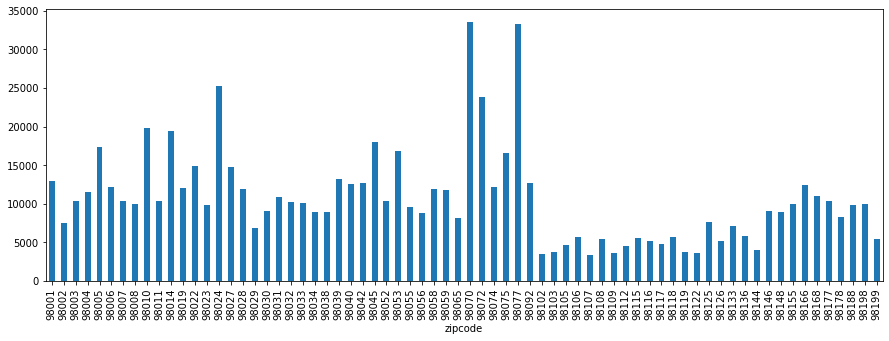

In [54]:
my_plot1 = sqftlot_mean.plot(kind = 'bar',figsize = (15,5))

##### Interestingly zipcodes with expensive houses like 98039, 98004, and 98040 have smaller lots for the houses. The houses with bigger lots are in zipcodes 98070 (Vashon, WA) and 98077(Woodinville, WA)

##### Module: Visualization Correlation 

Plotting a heat map based on the correlation of the housing market



In [56]:
house_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.305422,0.411983,0.528425,0.094008,0.231934,0.513288,0.271911,0.020935,0.114632,0.549998,0.092303
bedrooms,0.305422,1.000000,0.437850,0.524183,0.117174,0.140631,0.488316,0.291086,0.168184,0.012060,0.401853,0.122978
bathrooms,0.411983,0.437850,1.000000,0.529480,0.045078,0.478579,0.562966,0.190009,0.447870,0.048688,0.447119,0.044979
sqft_living,0.528425,0.524183,0.529480,1.000000,0.188358,0.284472,0.706844,0.331103,0.274114,0.040433,0.616800,0.199532
sqft_lot,0.094008,0.117174,0.045078,0.188358,1.000000,-0.097251,0.213714,0.051941,0.029119,0.016845,0.268162,0.790761
floors,0.231934,0.140631,0.478579,0.284472,-0.097251,1.000000,0.531089,-0.283344,0.590570,-0.011891,0.277157,-0.105094
sqft_above,0.513288,0.488316,0.562966,0.706844,0.213714,0.531089,1.000000,-0.163700,0.447219,0.009636,0.703925,0.233087
sqft_basement,0.271911,0.291086,0.190009,0.331103,0.051941,-0.283344,-0.163700,1.000000,-0.159414,0.058987,0.143759,0.041026
yr_built,0.020935,0.168184,0.447870,0.274114,0.029119,0.590570,0.447219,-0.159414,1.000000,-0.218159,0.331551,0.050283
yr_renovated,0.114632,0.012060,0.048688,0.040433,0.016845,-0.011891,0.009636,0.058987,-0.218159,1.000000,-0.025821,0.014524


(12.0, 0.0)

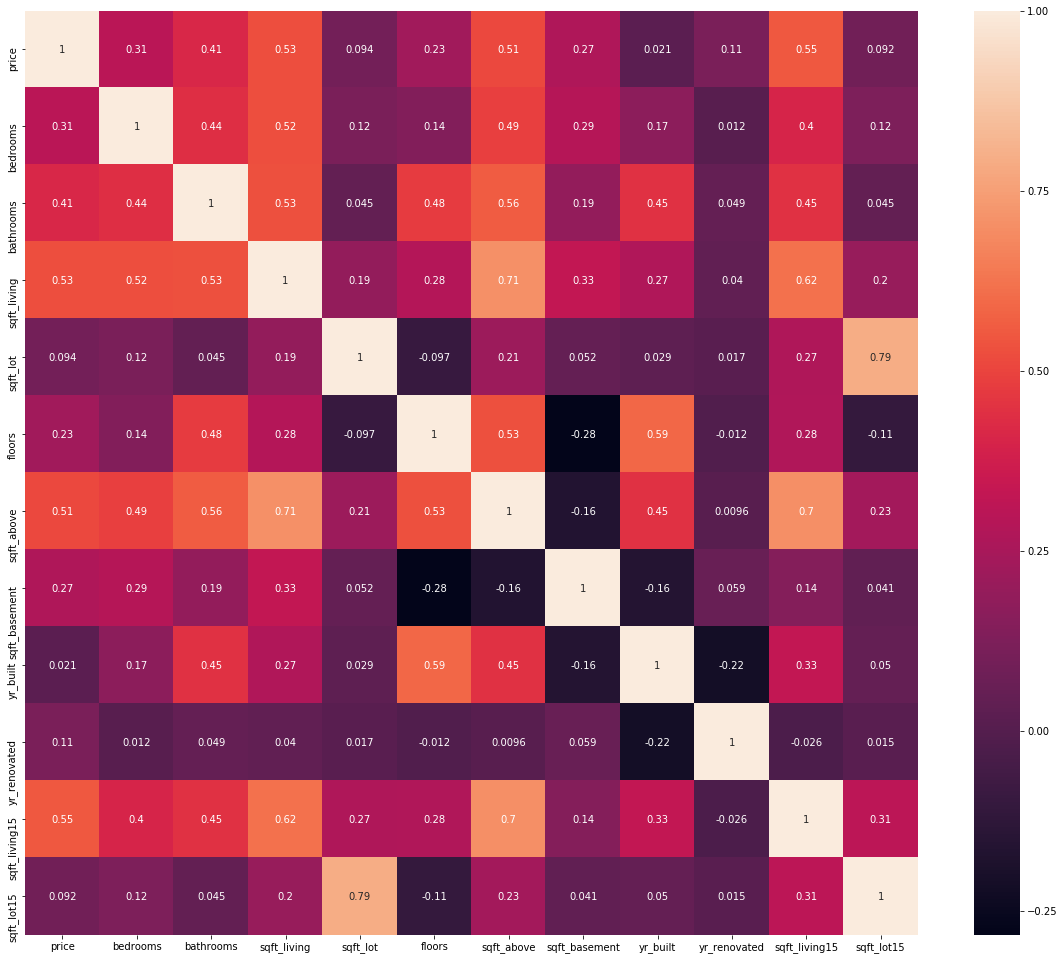

In [57]:
#Uses a seaborn heat map based on the correlation of the house dataframe

#Correlates the dataframe into a matrix
corr = house_df.corr()



#Setups the axis of the matplot lib figure

#Color codes the correlation matrix


plt.figure(figsize=(20, 17))

matrix = np.triu(corr)

ax = sns.heatmap(corr, annot = True , cmap = "rocket")
bottom, top = ax. get_ylim()

ax.set_ylim(bottom + 0.5, top - 0.5)



##### Module: Reduction of Redundant data and Performing Need Based Discretization

Checking for Variance inflation factor, and summarizing report to find R^2 values 

Check for VIF(Variance inflation factor) to detect multicollinearity in regression analysis. Check between highest correlation with price and sqft living, then check VIF for sqft_living and sqft_above.

Need to remove objects/categories/datetime columns from list to prevent strings from being used from VIF.


In [58]:
house_df.dtypes

id                       object
date             datetime64[ns]
price                   float64
bedrooms                  int32
bathrooms                 int32
sqft_living             float64
sqft_lot                float64
floors                    int32
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                      object
long                     object
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [59]:
for col in house_df.columns:
    print(col)

id
date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15


In [60]:
print(house_df)

               id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0         3          1       1180.0   
1      6414100192 2014-12-09  538000.0         3          2       2570.0   
2      5631500400 2015-02-25  180000.0         2          1        770.0   
3      2487200875 2014-12-09  604000.0         4          3       1960.0   
4      1954400510 2015-02-18  510000.0         3          2       1680.0   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21  360000.0         3          2       1530.0   
21609  6600060120 2015-02-23  400000.0         4          2       2310.0   
21610  1523300141 2014-06-23  402101.0         2          0       1020.0   
21611   291310100 2015-01-16  400000.0         3          2       1600.0   
21612  1523300157 2014-10-15  325000.0         2          0       1020.0   

       sqft_lot  floors waterfront view  ... grade sqft_above  sqft_basement  \
0      

##### Module Multicollinearity
Removing ordinal data for data manipulation and testing for multicollinearity

Module VIF Results and Data removal
Variance inflation factor(VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. A VIF provides a measure of multicollinearity among the independent variables in a multiple regression model. A large variance inflation factor indicates that an independent variable has a high collinear relationship to the other variables. To account for the multilinear regression formula, a VIF of > 10 will be used to remove columns that may inflate variabels

In [61]:

X = house_df.drop(columns = ['waterfront', 'view', 'date', 'id', 'condition', 'grade', 'zipcode', 'lat', 'long'])

#VIF dataframe
#https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

vif_data = pd.DataFrame()

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data["Feature"] = X.columns

print(vif_data)


# The higher the VIF value, would indicate a higher correlation. 
# As sqft_living and sqft_above are pretty much similar since they 
# take the same mount of square footage. only difference is that the 
# sqft_above takes into account the footageof the basement. Research papers
# consider a VIF > 10 as an indicator of multicollinearity

          VIF        Feature
0    8.950135          price
1   27.270752       bedrooms
2   15.395015      bathrooms
3   19.832803    sqft_living
4    5.093631       sqft_lot
5   14.498333         floors
6   42.925978     sqft_above
7    3.748817  sqft_basement
8   28.647556       yr_built
9    1.070809   yr_renovated
10  28.933168  sqft_living15
11   6.665755     sqft_lot15


##### Cleaning data and Aggregating

Plots the dataframe after dropping columns that do not have correlation to save computing power and prevent overfitting when creating a multiple regression value.

C:\Users\Luke\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Luke\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Luke\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


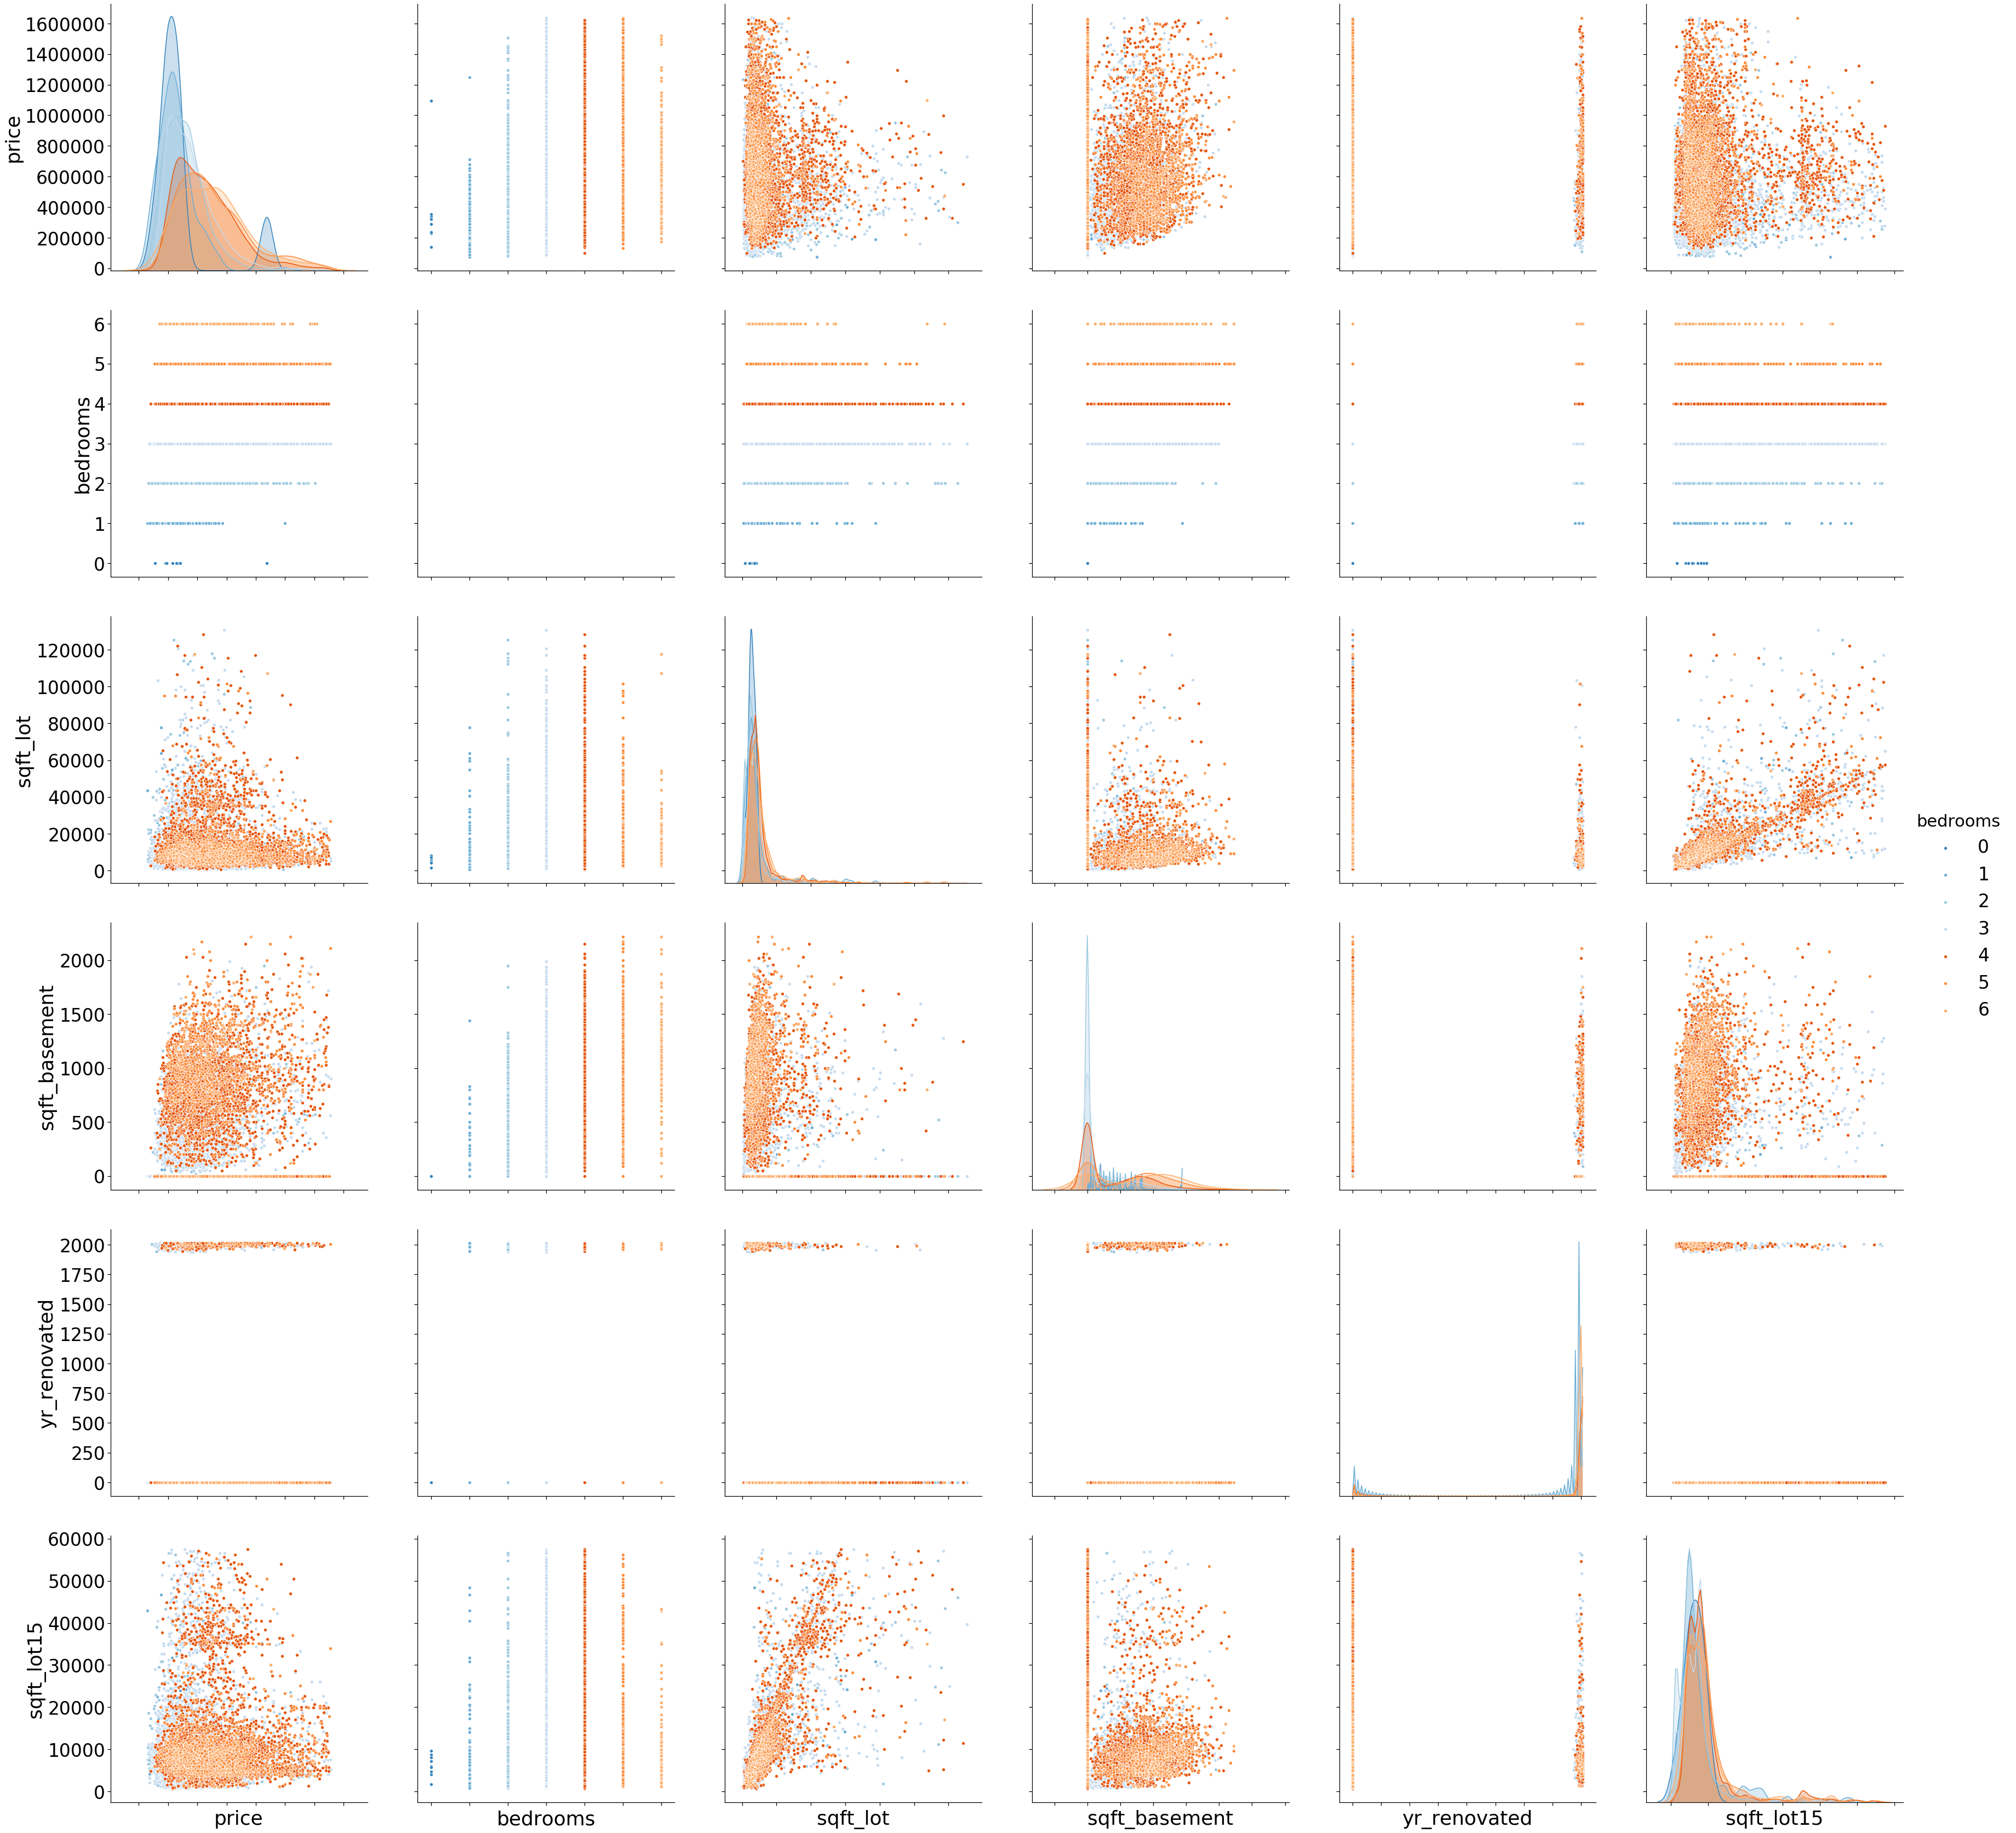

In [62]:

#Excludes data that do not have much correlation, saves both computing power and prevents overfitting when making a mulitple regression value.


with sns.plotting_context("notebook", font_scale = 3):
    g = sns.pairplot(house_df[['price', 'bedrooms', 'sqft_lot', 'sqft_basement', 'yr_renovated', 'sqft_lot15']], hue = 'bedrooms', palette = 'tab20c', size = 8)
    g.set(xticklabels = []);


In [64]:
# Preparing X and Y plots for the regression model between price and sqft_lot



# create linear regression object
regr = LinearRegression()


#fit linear regression
regr.fit(house_df[['sqft_lot','price', 'bedrooms', 'sqft_basement', 'yr_renovated', 'sqft_lot15']], house_df[['price']])


#prints intercept of the best fit line
print(regr.intercept_)


#prints the slope of the best fit line against 'sqft_lot', 'sqft_lot15', 'sqft_basement' against price
print(regr.coef_)






[8.73114914e-10]
[[ 2.42023076e-15  1.00000000e+00  7.95326830e-13 -4.94023554e-16
  -2.38393365e-14 -1.75193051e-16]]


#### Module OLS Correction Model and Summary
Will use statsmodels api to establish a Oridnary Linear Square model to find the correlation coefficients and the R-squared values in respect to price.



In [65]:
#imports statsmodels api to find relational R-squared values
#Uses the least Squares method and OLS model.
import statsmodels.api as sm

#Compiles a list of house_df to find the related coefficients between price and the other columns.
#sm.add_constant includes the interecept value to help center the value.
x = house_df[[ 'sqft_lot', 'bedrooms', 'sqft_basement', 'yr_renovated', 'sqft_lot15']]
y = house_df[['price']]
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()


C:\Users\Luke\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     672.8
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:49:57   Log-Likelihood:            -2.7726e+05
No. Observations:               20157   AIC:                         5.545e+05
Df Residuals:                   20151   BIC:                         5.546e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.096e+05   6623.225     31.642      0.000    1.97e+05    2.23e+05
sqft_lot          0.7628      0.256      2.984      0.003       0.262       1.264
bedrooms       6.964e+04   1985.270     35.077      0.000    6.57e+04    7.35e+04
sqft_basement   115.9385      4.100     28.280      0.000     107.903     123.974
yr_renovated     62.8006      4.128     15.213      0.000      54.709      70.892
sqft_lot15        0.9168      0.347      2.640      0.008       0.236       1.597
==============================================================================
Omnibus:                     4420.834   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10218.494
Skew:                           1.240   Prob(JB):                         0.00
Kurtosis:                       5.453   Cond. No.                     7.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Comparing OLS and linear regression model with columns that are not removed from the prediction model. 
Before correction of multicollinearity

In [66]:
#imports statsmodels api to find relational R-squared values
#Uses the least Squares method and OLS model.
#Uses the values 
import statsmodels.api as sm

#Compiles a list of house_df to find the related coefficients between price and the other columns.
#sm.add_constant includes the interecept value to help center the value.
x = house_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
              'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']]
y = house_df[['price']]
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1850.
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:50:08   Log-Likelihood:            -2.7178e+05
No. Observations:               20157   AIC:                         5.436e+05
Df Residuals:                   20145   BIC:                         5.437e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.454e+06   1.08e+05     50.610      0.000    5.24e+06    5.67e+06
bedrooms      -3.485e+04   1852.135    -18.817      0.000   -3.85e+04   -3.12e+04
bathrooms      3.765e+04   2690.881     13.992      0.000    3.24e+04    4.29e+04
sqft_living       1.9569      2.656      0.737      0.461      -3.250       7.163
sqft_lot         -0.2554      0.195     -1.307      0.191      -0.639       0.128
floors         7.411e+04   3282.924     22.573      0.000    6.77e+04    8.05e+04
sqft_above      156.1796      4.258     36.676      0.000     147.833     164.526
sqft_basement   187.9739      4.623     40.658      0.000     178.912     197.036
yr_built      -2810.7741     56.261    -49.960      0.000   -2921.050   -2700.498
yr_renovated     15.9419      3.291      4.844      0.000       9.491      22.393
sqft_living15   116.0500      3.215     36.094      0.000     109.748     122.352
sqft_lot15       -1.9606      0.271     -7.232      0.000      -2.492      -1.429
==============================================================================
Omnibus:                     3318.833   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8403.270
Skew:                           0.918   Prob(JB):                         0.00
Kurtosis:                       5.576   Cond. No.                     1.59e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
# Preparing X and Y plots for the regression model between price and sqft_lot



# create linear regression object
regr = LinearRegression()


#fit linear regression
regr.fit(house_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
              'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']],
         house_df[['price']])


#prints intercept of the best fit line
print(regr.intercept_)


#prints the slope of the best fit line against 'sqft_lot', 'sqft_lot15', 'sqft_basement' against price
print(regr.coef_)


[5454279.9515204]
[[-3.48512796e+04  3.76498831e+04  1.95685160e+00 -2.55424132e-01
   7.41054523e+04  1.56179577e+02  1.87973946e+02 -2.81077410e+03
   1.59418811e+01  1.16050028e+02 -1.96055677e+00]]
